<a href="https://colab.research.google.com/github/SuryaTeja-aiml/2024-StatMLAssignments/blob/main/2303A52007_StatML_Project_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##🤖 Statistical Machine Learning Project

## 🗒️ Basic Information
Name: K. Surya Teja

Hall Ticket Number: 2303A52007

Batch: 31

##❔About The Project
Data Set: Iris

Type: Classification

Description:Classify iris plants into three species in this classic dataset

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id,
SepalLengthCm,
SepalWidthCm,
PetalLengthCm,
PetalWidthCm,
Species.

[Reference Link](https://www.kaggle.com/datasets/uciml/iris/data)


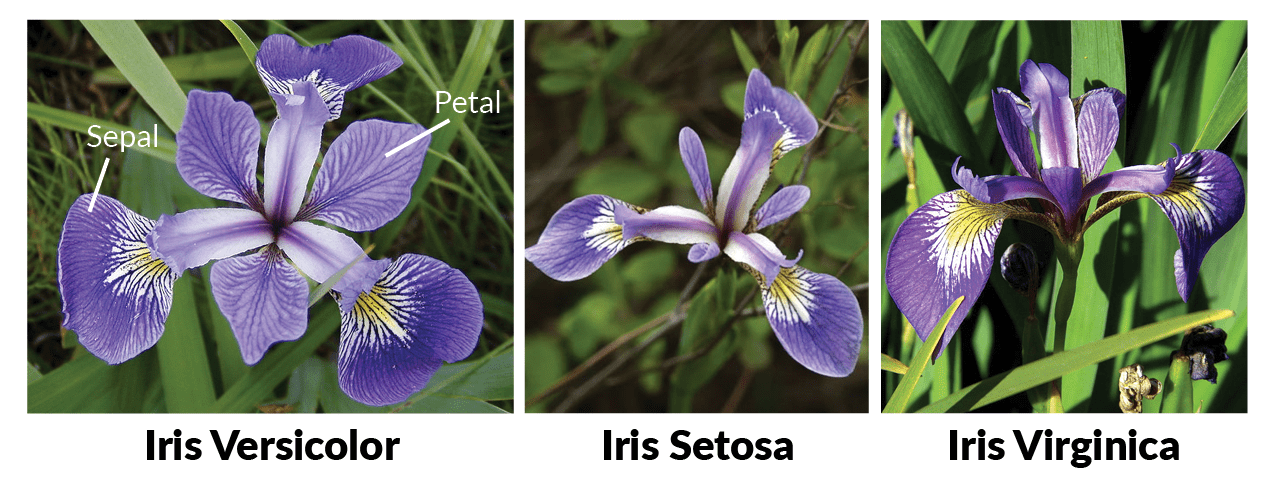

## 📩 Importing Libraries





In [132]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import warnings
warnings.filterwarnings("ignore")

## 🔍 Reading the dataset

In [104]:
iris = pd.read_csv('Iris.csv')

## 🫳 Dropping ID

In [105]:
iris = iris.drop("Id", axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 🧑‍🏫 Describing  

In [106]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [107]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 🔢 Count of each species

In [108]:
iris["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


## 0️⃣ Checking null values

In [109]:
print(iris.isna().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


## ⚔️ Features and Target Variables

In [110]:
X = iris.drop('Species', axis=1)
y = iris['Species']

## ⚙️ Data Normalization

In [111]:
nm = (X - X.min()) / (X.max() - X.min())
nm

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


## 🪄 Splitting

In [112]:
X_train, X_test, y_train, y_test = train_test_split(nm, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## 📊 Logistic Regression

In [113]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## 📏 Accuracy

In [114]:
accuracy_score(y_test,y_pred)

0.9

## 📃 Classification Report

In [115]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.77      0.87        13
 Iris-virginica       0.67      1.00      0.80         6

       accuracy                           0.90        30
      macro avg       0.89      0.92      0.89        30
   weighted avg       0.93      0.90      0.90        30



## 🗂️ Confusion Matrix

In [116]:
print(confusion_matrix(y_test,y_pred))

[[11  0  0]
 [ 0 10  3]
 [ 0  0  6]]


## 🧩 SVC

In [117]:
s = SVC()
s.fit(X_train, y_train)

svm_pred = s.predict(X_test)

## 📏 SVC Accuracy
accuracy_svc = accuracy_score(y_test, svm_pred)
print("SVC Accuracy:", accuracy_svc)

## 📃 SVC Classification Report
print(classification_report(y_test, svm_pred))

## 🗂️ SVC Confusion Matrix
print(confusion_matrix(y_test, svm_pred))

SVC Accuracy: 0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


## 🤖 Perceptron Model

In [118]:
p = Perceptron(max_iter=1000, tol=1e-3, random_state=1)
p.fit(X_train, y_train)
perceptron_pred = p.predict(X_test)

## 📏 Perceptron Accuracy
print("Perceptron Accuracy:", accuracy_score(y_test, perceptron_pred))

## 📃 Perceptron Classification Report
print("Perceptron Report:")
print(classification_report(y_test, perceptron_pred))

## 🗂️ Perceptron Confusion Matrix
print("Perceptron Confusion Matrix:")
print(confusion_matrix(y_test, perceptron_pred))

Perceptron Accuracy: 0.8333333333333334
Perceptron Report:
                 precision    recall  f1-score   support

    Iris-setosa       0.73      1.00      0.85        11
Iris-versicolor       1.00      0.62      0.76        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.83        30
      macro avg       0.86      0.87      0.84        30
   weighted avg       0.87      0.83      0.83        30

Perceptron Confusion Matrix:
[[11  0  0]
 [ 4  8  1]
 [ 0  0  6]]


## 🤖 KNN Model

In [119]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

## 📏 KNN Accuracy
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))

## 📃 KNN Classification Report
print("KNN Report:")
print(classification_report(y_test, knn_pred))

## 🗂️ KNN Confusion Matrix
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, knn_pred))

KNN Accuracy: 0.9666666666666667
KNN Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

KNN Confusion Matrix:
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


## 🔄 Bootstrapping for Model Evaluation

In [120]:
def bootstrap(data, n_iterations=1000, statistic=np.mean, random_seed=42):
    np.random.seed(random_seed)
    bootstrap_stats = []
    for _ in range(n_iterations):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_stats.append(statistic(sample))
    return np.array(bootstrap_stats)

# Bootstrapping on a specific feature (e.g., 'SepalLengthCm')
feature_name = 'SepalLengthCm'
if feature_name in iris.columns:
    feature_data = iris[feature_name]
    n_iterations = 1000

    # Perform bootstrapping
    bootstrap_means = bootstrap(feature_data, n_iterations=n_iterations, statistic=np.mean)

    # Calculate confidence intervals
    confidence_level = 0.95
    lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)

    print(f"Bootstrap mean estimate: {np.mean(bootstrap_means):.4f}")
    print(f"{confidence_level*100:.1f}% confidence interval: ({lower_bound:.4f}, {upper_bound:.4f})")
else:
    print(f"The dataset does not contain the '{feature_name}' column.")

Bootstrap mean estimate: 5.8447
95.0% confidence interval: (5.7106, 5.9727)


Logistic Regression mean accuracy: 0.8763
Logistic Regression 95% CI: 0.7667 - 0.9333
SVM mean accuracy: 0.9713
SVM 95% CI: 0.9333 - 1.0000
Perceptron mean accuracy: 0.7683
Perceptron 95% CI: 0.5667 - 0.9667
KNN mean accuracy: 0.9757
KNN 95% CI: 0.9333 - 1.0000


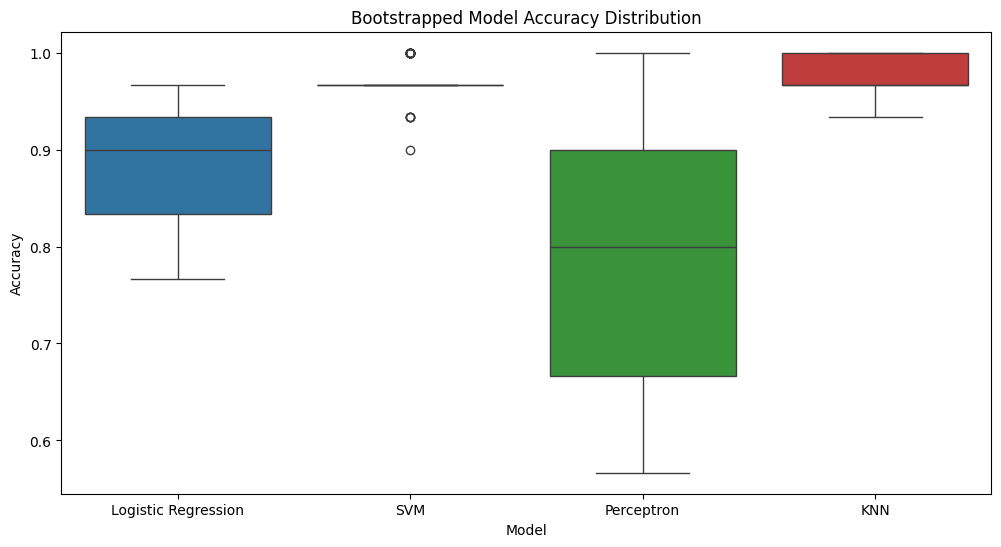

In [121]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'SVM': SVC(),
    'Perceptron': Perceptron(max_iter=200, tol=1e-3),
    'KNN': KNeighborsClassifier()
}

# Bootstrapping function for accuracy
def bootstrap_accuracy(model, X_train, X_test, y_train, y_test, num_samples=100):
    accuracies = []
    for _ in range(num_samples):
        # Create bootstrap samples
        X_train_sample, y_train_sample = resample(X_train, y_train, replace=True)
        model.fit(X_train_sample, y_train_sample)
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    return accuracies

# Evaluate models with bootstrapping
from sklearn.utils import resample

model_accuracies = {}

for name, model in models.items():
    boot_acc = bootstrap_accuracy(model, X_train, X_test, y_train, y_test)
    model_accuracies[name] = boot_acc
    print(f"{name} mean accuracy: {np.mean(boot_acc):.4f}")
    print(f"{name} 95% CI: {np.percentile(boot_acc, 2.5):.4f} - {np.percentile(boot_acc, 97.5):.4f}")

# Plot the accuracy distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=pd.DataFrame(model_accuracies))
plt.title('Bootstrapped Model Accuracy Distribution')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

## 🕵️ PCA

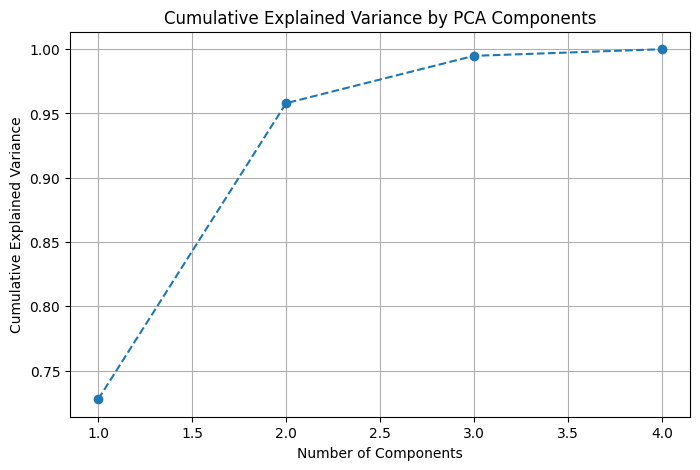

Explained Variance Ratio by Component:
Component 1: 0.7277
Component 2: 0.2303
Component 3: 0.0368
Component 4: 0.0052


In [122]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
scaler = StandardScaler()
x_scaled = scaler.fit_transform(iris[features])
pca = PCA(n_components=None)
x_pca = pca.fit_transform(x_scaled)
explained_variance = pca.explained_variance_ratio_

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Print explained variance ratio
print("Explained Variance Ratio by Component:")
for i, ratio in enumerate(explained_variance, start=1):
    print(f"Component {i}: {ratio:.4f}")

## 📈 Visualization of the Data

## 📊 Histogram of Iris Features 🌸

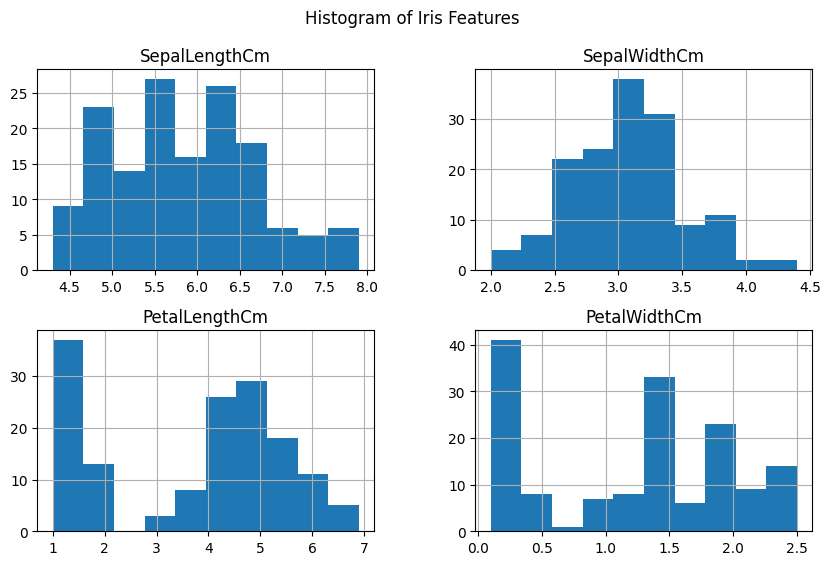

In [123]:
iris.hist(figsize=(10, 6))
plt.suptitle('Histogram of Iris Features')
plt.show()

## 📊 Scatter Plot: 🌸 Sepal Length vs. Sepal Width 🌼

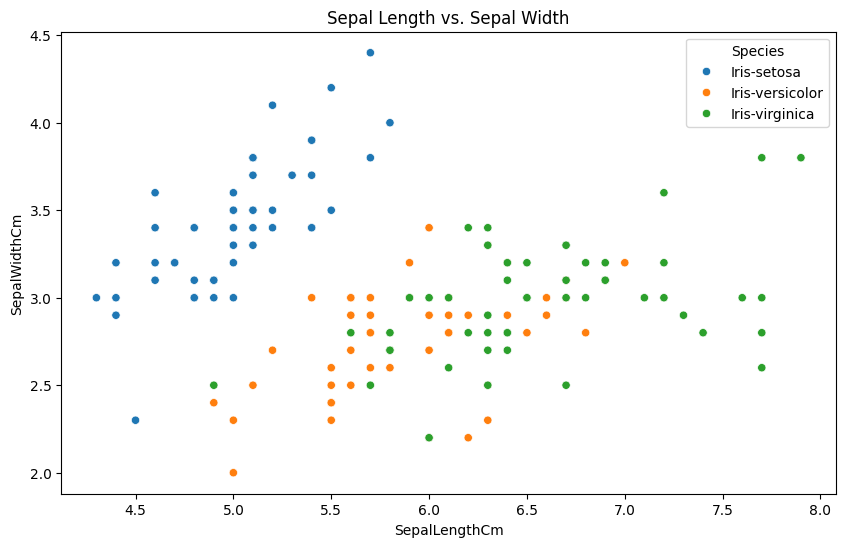

In [124]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris, x='SepalLengthCm', y='SepalWidthCm', hue='Species')
plt.title('Sepal Length vs. Sepal Width')
plt.show()

## 📊 Model vs Accuracy Visualization

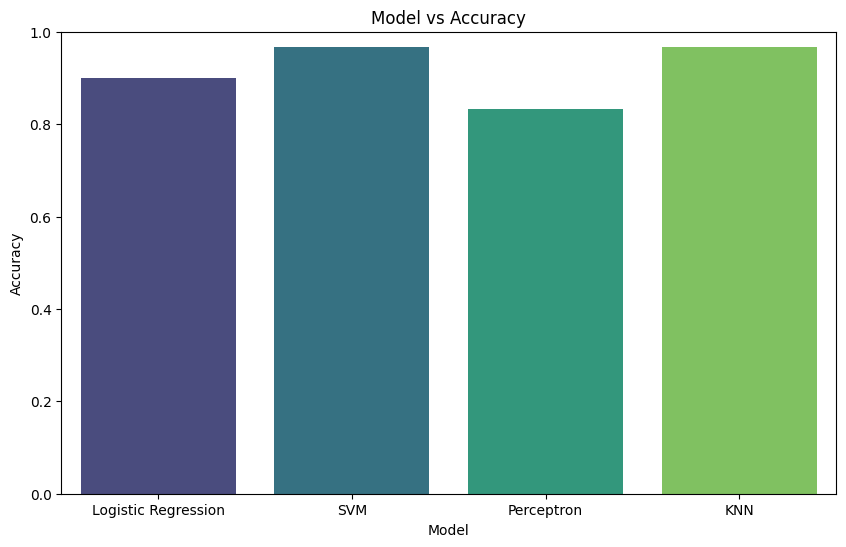

In [125]:
# Accuracies of the models
model_accuracies = {
    'Logistic Regression': accuracy_score(y_test, y_pred),
    'SVM': accuracy_score(y_test, svm_pred),
    'Perceptron': accuracy_score(y_test, perceptron_pred),
    'KNN': accuracy_score(y_test, knn_pred)
}

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='viridis')
plt.title('Model vs Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

## ❓Confusion Matrix

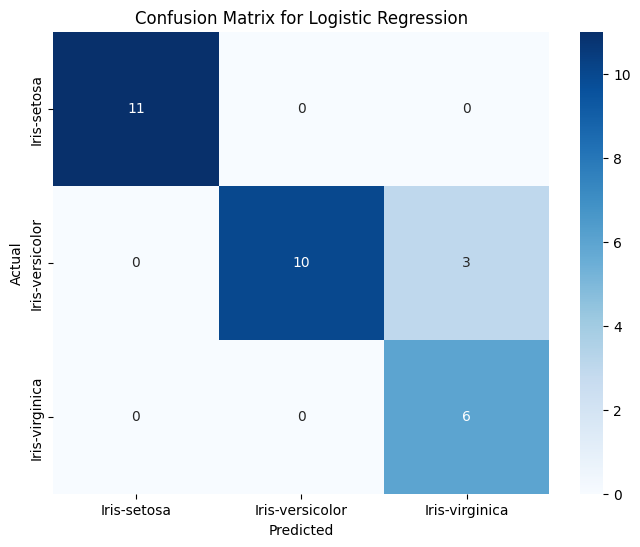

In [126]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 🔬Pairplot

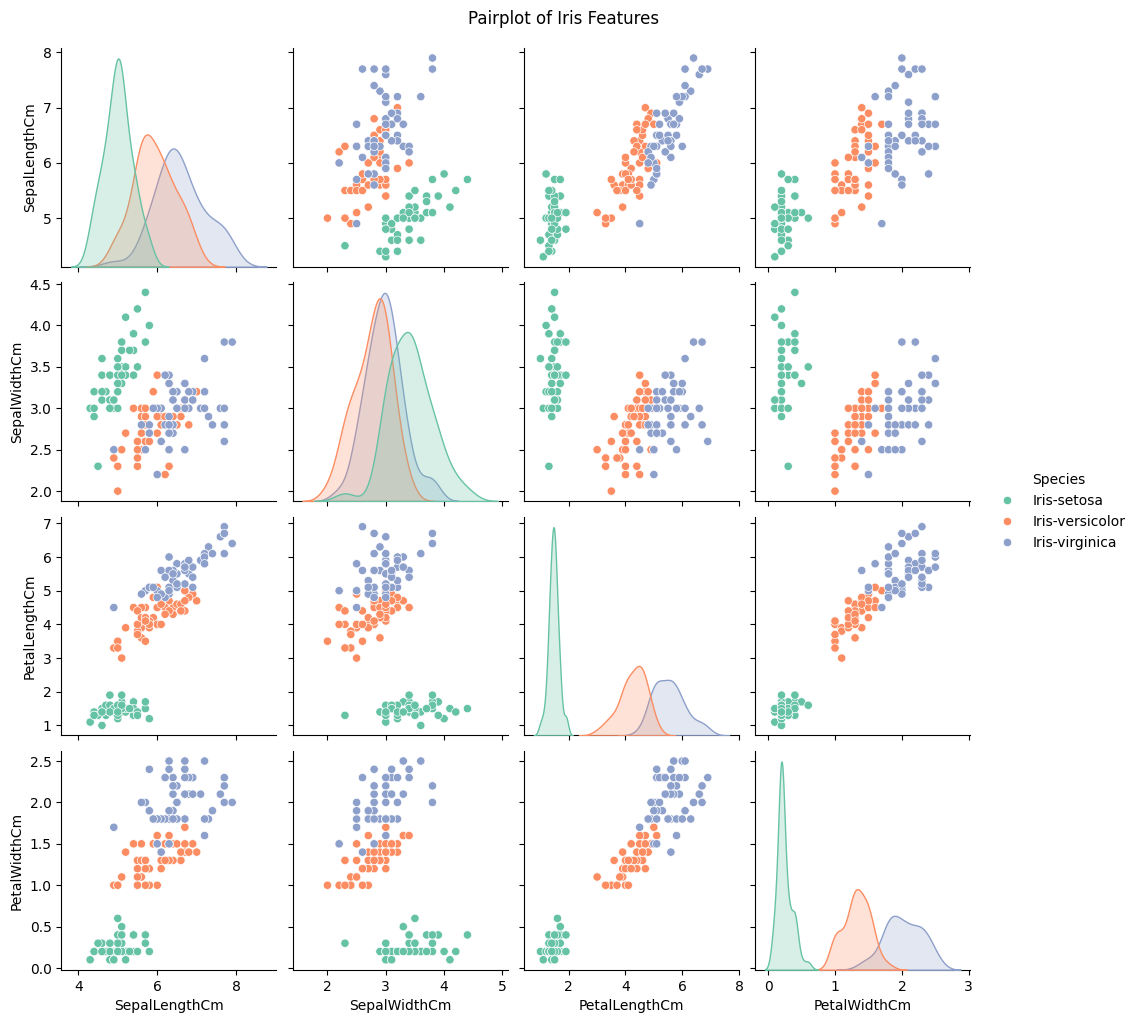

In [127]:
sns.pairplot(iris, hue='Species', diag_kind='kde', palette='Set2')
plt.suptitle('Pairplot of Iris Features', y=1.02)
plt.show()

## 🔥 Heatmap

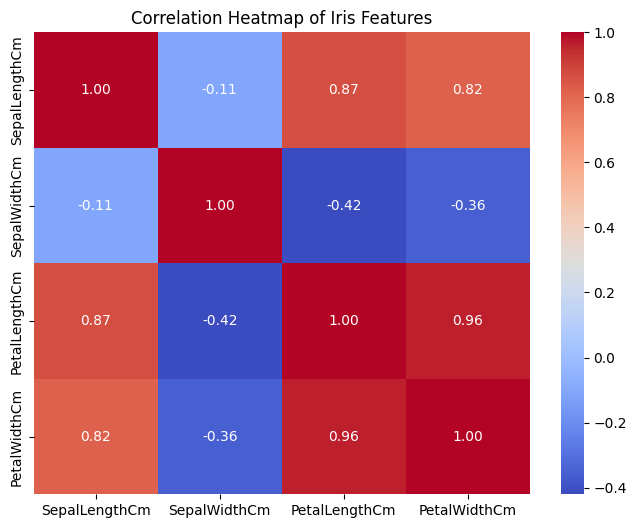

In [128]:
correlation_matrix = iris.iloc[:, :-1].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Iris Features')
plt.show()

## 📦Boxplot

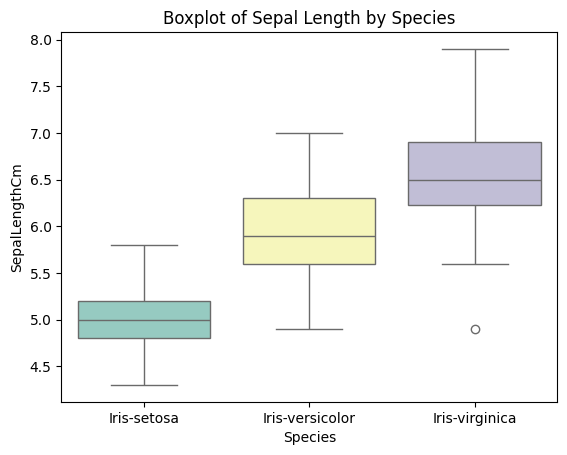

In [129]:
sns.boxplot(x='Species', y='SepalLengthCm', data=iris, palette='Set3')
plt.title('Boxplot of Sepal Length by Species')
plt.show()

## 🎻Violin Plot

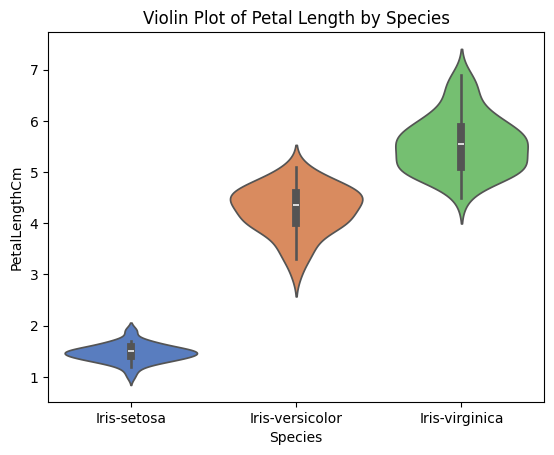

In [130]:
sns.violinplot(x='Species', y='PetalLengthCm', data=iris, palette='muted')
plt.title('Violin Plot of Petal Length by Species')
plt.show()

## ☢️ Rador Plot

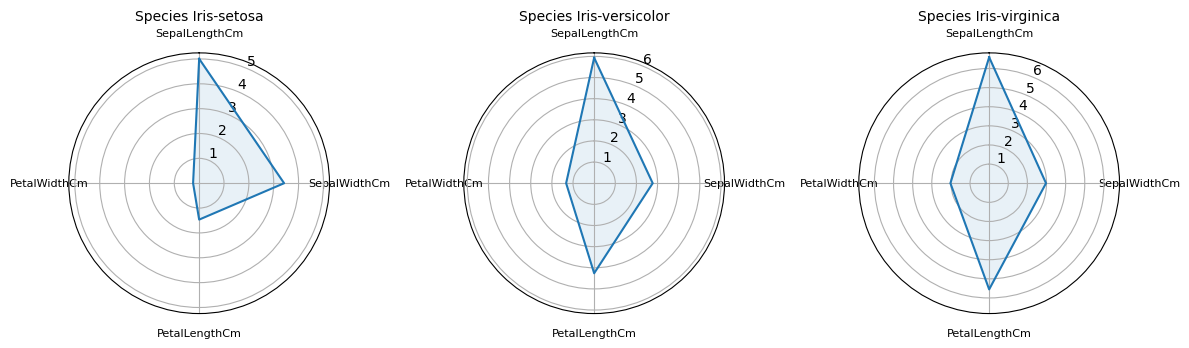

In [136]:
categories = iris.columns[:-1]
species_mean = iris.groupby('Species').mean()
fig, axes = plt.subplots(1, len(species_mean), subplot_kw=dict(polar=True), figsize=(12, 4))

for idx, (species, ax) in enumerate(zip(species_mean.index, axes)):
    values = species_mean.loc[species].values.flatten().tolist()
    values += values[:1]
    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.plot(angles, values, label=f'Species {species}')
    ax.fill(angles, values, alpha=0.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=8)
    ax.set_title(f'Species {species}', fontsize=10)
fig.tight_layout()
plt.show()